In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
pd.options.mode.chained_assignment = None
salary = pd.read_csv ('salaries.txt')
print(salary)

      Rk                       Player   Tm    2021-22    2022-23    2023-24  \
0      1      Stephen Curry\curryst01  GSW  $45780966  $48070014  $51915615   
1      2           John Wall\walljo01  HOU  $44310840  $47366760        NaN   
2      3  Russell Westbrook\westbru01  LAL  $44211146  $47063478        NaN   
3      4       James Harden\hardeja01  PHI  $43848000  $46872000        NaN   
4      5       LeBron James\jamesle01  LAL  $41180544  $44474988        NaN   
..   ...                          ...  ...        ...        ...        ...   
612  613        Moses Brown\brownmo01  CLE   $1720779        NaN        NaN   
613  614       Juwan Morgan\morgaju01  BOS     $19186   $1815677        NaN   
614  615      Trent Forrest\forretr01  UTA      $8558        NaN        NaN   
615  616      Ish Wainright\wainris01  PHO      $8558        NaN        NaN   
616  617    Kessler Edwards\edwarke02  BRK      $5318   $1563518        NaN   

       2024-25    2025-26 2026-27    Signed Using  

In [ ]:
df1 = pd.DataFrame(salary)
df1 = df1.drop(columns = ["Rk", "2022-23", "2023-24", "2024-25", "2025-26", "2026-27", "Signed Using", "Guaranteed"])
print(df1)

                          Player   Tm    2021-22
0        Stephen Curry\curryst01  GSW  $45780966
1             John Wall\walljo01  HOU  $44310840
2    Russell Westbrook\westbru01  LAL  $44211146
3         James Harden\hardeja01  PHI  $43848000
4         LeBron James\jamesle01  LAL  $41180544
..                           ...  ...        ...
612        Moses Brown\brownmo01  CLE   $1720779
613       Juwan Morgan\morgaju01  BOS     $19186
614      Trent Forrest\forretr01  UTA      $8558
615      Ish Wainright\wainris01  PHO      $8558
616    Kessler Edwards\edwarke02  BRK      $5318

[617 rows x 3 columns]


In [ ]:
for i in range(0, len(df1)):
  mark = df1['Player'][i].index('\\')
  df1['Player'][i] = df1['Player'][i][:mark]
print(df1['Player'])

0          Stephen Curry
1              John Wall
2      Russell Westbrook
3           James Harden
4           LeBron James
             ...        
612          Moses Brown
613         Juwan Morgan
614        Trent Forrest
615        Ish Wainright
616      Kessler Edwards
Name: Player, Length: 617, dtype: object


In [ ]:
data = pd.read_csv ('advanced_stats_2122.txt')
data = data.drop(columns = ['Unnamed: 24', 'Unnamed: 19'])
print(data)

      Rk                    Player Pos  Age   Tm   G    MP   PER    TS%  \
0      1     Deni Avdija\avdijde01  SF   21  WAS  82  1984  11.6  0.536   
1      2        Saddiq Bey\beysa01  SF   22  DET  82  2704  14.0  0.529   
2      3   Mikal Bridges\bridgmi01  SF   25  PHO  82  2854  14.4  0.627   
3      4    Kevon Looney\looneke01   C   25  GSW  82  1732  15.7  0.586   
4      5   Dwight Powell\poweldw01   C   30  DAL  82  1798  18.1  0.725   
..   ...                       ...  ..  ...  ...  ..   ...   ...    ...   
600  601      Ade Murkey\murkead01  SG   24  SAC   1     1   0.0    NaN   
601  602    Malik Newman\newmama01  PG   24  CLE   1     8  28.6  0.680   
602  603   Jaysean Paige\paigeja01  PG   27  DET   1     7 -22.2  0.000   
603  604  Trayvon Palmer\palmetr01  SG   27  DET   1    17  -5.7  0.000   
604  605        Matt Ryan\ryanma01  SF   24  BOS   1     5   3.5  0.300   

      3PAr  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  
0    0.447  ...  12.0  

In [ ]:
df = pd.DataFrame(data)
print(df)

      Rk                    Player Pos  Age   Tm   G    MP   PER    TS%  \
0      1     Deni Avdija\avdijde01  SF   21  WAS  82  1984  11.6  0.536   
1      2        Saddiq Bey\beysa01  SF   22  DET  82  2704  14.0  0.529   
2      3   Mikal Bridges\bridgmi01  SF   25  PHO  82  2854  14.4  0.627   
3      4    Kevon Looney\looneke01   C   25  GSW  82  1732  15.7  0.586   
4      5   Dwight Powell\poweldw01   C   30  DAL  82  1798  18.1  0.725   
..   ...                       ...  ..  ...  ...  ..   ...   ...    ...   
600  601      Ade Murkey\murkead01  SG   24  SAC   1     1   0.0    NaN   
601  602    Malik Newman\newmama01  PG   24  CLE   1     8  28.6  0.680   
602  603   Jaysean Paige\paigeja01  PG   27  DET   1     7 -22.2  0.000   
603  604  Trayvon Palmer\palmetr01  SG   27  DET   1    17  -5.7  0.000   
604  605        Matt Ryan\ryanma01  SF   24  BOS   1     5   3.5  0.300   

      3PAr  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  
0    0.447  ...  12.0  

In [ ]:
for i in range(0, len(df)):
  mark = df['Player'][i].index('\\')
  df['Player'][i] = df['Player'][i][:mark]
print(df['Player'])

0         Deni Avdija
1          Saddiq Bey
2       Mikal Bridges
3        Kevon Looney
4       Dwight Powell
            ...      
600        Ade Murkey
601      Malik Newman
602     Jaysean Paige
603    Trayvon Palmer
604         Matt Ryan
Name: Player, Length: 605, dtype: object


In [ ]:
df['Salary'] = 1
print(df)

      Rk          Player Pos  Age   Tm   G    MP   PER    TS%   3PAr  ...  \
0      1     Deni Avdija  SF   21  WAS  82  1984  11.6  0.536  0.447  ...   
1      2      Saddiq Bey  SF   22  DET  82  2704  14.0  0.529  0.537  ...   
2      3   Mikal Bridges  SF   25  PHO  82  2854  14.4  0.627  0.364  ...   
3      4    Kevon Looney   C   25  GSW  82  1732  15.7  0.586  0.003  ...   
4      5   Dwight Powell   C   30  DAL  82  1798  18.1  0.725  0.092  ...   
..   ...             ...  ..  ...  ...  ..   ...   ...    ...    ...  ...   
600  601      Ade Murkey  SG   24  SAC   1     1   0.0    NaN    NaN  ...   
601  602    Malik Newman  PG   24  CLE   1     8  28.6  0.680  0.200  ...   
602  603   Jaysean Paige  PG   27  DET   1     7 -22.2  0.000  0.667  ...   
603  604  Trayvon Palmer  SG   27  DET   1    17  -5.7  0.000  0.000  ...   
604  605       Matt Ryan  SF   24  BOS   1     5   3.5  0.300  1.000  ...   

     USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  Salary  
0    16.3

In [ ]:
for i in range(0, len(df)):
    for j in range(0, len(df1)):
        if (df['Player'][i] == df1["Player"][j]):
            df['Salary'][i] = df1["2021-22"][j]
print(df)

      Rk          Player Pos  Age   Tm   G    MP   PER    TS%   3PAr  ...  \
0      1     Deni Avdija  SF   21  WAS  82  1984  11.6  0.536  0.447  ...   
1      2      Saddiq Bey  SF   22  DET  82  2704  14.0  0.529  0.537  ...   
2      3   Mikal Bridges  SF   25  PHO  82  2854  14.4  0.627  0.364  ...   
3      4    Kevon Looney   C   25  GSW  82  1732  15.7  0.586  0.003  ...   
4      5   Dwight Powell   C   30  DAL  82  1798  18.1  0.725  0.092  ...   
..   ...             ...  ..  ...  ...  ..   ...   ...    ...    ...  ...   
600  601      Ade Murkey  SG   24  SAC   1     1   0.0    NaN    NaN  ...   
601  602    Malik Newman  PG   24  CLE   1     8  28.6  0.680  0.200  ...   
602  603   Jaysean Paige  PG   27  DET   1     7 -22.2  0.000  0.667  ...   
603  604  Trayvon Palmer  SG   27  DET   1    17  -5.7  0.000  0.000  ...   
604  605       Matt Ryan  SF   24  BOS   1     5   3.5  0.300  1.000  ...   

     USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP     Salary  
0    1

In [ ]:
for i in range(0,len(df)):
    if df['G'][i] < 30:
        df = df.drop(i)
df = df.reset_index(drop=True)
print(df)

      Rk          Player Pos  Age   Tm   G    MP   PER    TS%   3PAr  ...  \
0      1     Deni Avdija  SF   21  WAS  82  1984  11.6  0.536  0.447  ...   
1      2      Saddiq Bey  SF   22  DET  82  2704  14.0  0.529  0.537  ...   
2      3   Mikal Bridges  SF   25  PHO  82  2854  14.4  0.627  0.364  ...   
3      4    Kevon Looney   C   25  GSW  82  1732  15.7  0.586  0.003  ...   
4      5   Dwight Powell   C   30  DAL  82  1798  18.1  0.725  0.092  ...   
..   ...             ...  ..  ...  ...  ..   ...   ...    ...    ...  ...   
403  404  Bruno Fernando   C   23  TOT  30   152  21.2  0.671  0.036  ...   
404  405      Kevin Knox  SF   22  TOT  30   222  10.9  0.491  0.635  ...   
405  406      Vit Krejci  SG   21  OKC  30   690   8.5  0.529  0.587  ...   
406  407    Kelan Martin  SF   26  TOT  30   450   9.4  0.484  0.439  ...   
407  408    Semi Ojeleye  PF   27  TOT  30   406   6.7  0.438  0.505  ...   

     USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP     Salary  
0    16

In [ ]:
for i in range(0,len(df)):
  if df['Salary'][i] == 1 or type(df['Salary'][i]) != str:
    df = df.drop(i)

df = df.sort_values(by = ['WS'])
df = df.reset_index(drop=True)
for i in range(0,len(df)):
  df['Salary'][i] = float(df['Salary'][i].replace("$", ""))
print(df)

      Rk                 Player    Pos  Age   Tm   G    MP   PER    TS%  \
0    315            Jalen Suggs     PG   20  ORL  48  1307   8.6  0.455   
1    395           Keifer Sykes     PG   28  IND  32   566   5.9  0.456   
2    368           Keon Johnson     SG   19  TOT  37   697   8.7  0.453   
3    178        Cade Cunningham     PG   20  DET  64  2088  13.1  0.504   
4    377          Elijah Hughes  SG-SF   23  TOT  36   434   5.4  0.426   
..   ...                    ...    ...  ...  ...  ..   ...   ...    ...   
390   65     Karl-Anthony Towns      C   26  MIN  74  2476  24.1  0.640   
391  152            Rudy Gobert      C   29  UTA  66  2120  24.7  0.732   
392  123            Joel Embiid      C   27  PHI  68  2297  31.2  0.616   
393  132  Giannis Antetokounmpo     PF   27  MIL  67  2204  32.1  0.633   
394   62           Nikola Jokić      C   26  DEN  74  2476  32.8  0.661   

      3PAr  ...  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  \
0    0.358  ...  25.3  -3.

In [ ]:
!pip install speedml
from speedml import Speedml

In [ ]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)
training_data.to_csv('train.csv')
testing_data.to_csv('test.csv')

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Shape,"train (316, 28) | test (79, 28)",
Numerical Ratio,92%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, G, PER, TS%, FTr, ORB%, DRB%, TRB%, AST%...",(>10) categories. Use feature.density
Numerical Continuous,"[Unnamed: 0, Rk, MP, 3PAr]",~80% unique. Use plot.continuous.
Text High-cardinality,"[Tm, Pos]",(>10) categories. Use feature.labels.
Target Analysis (Salary),Pre-process.,Dimensionality reduction?


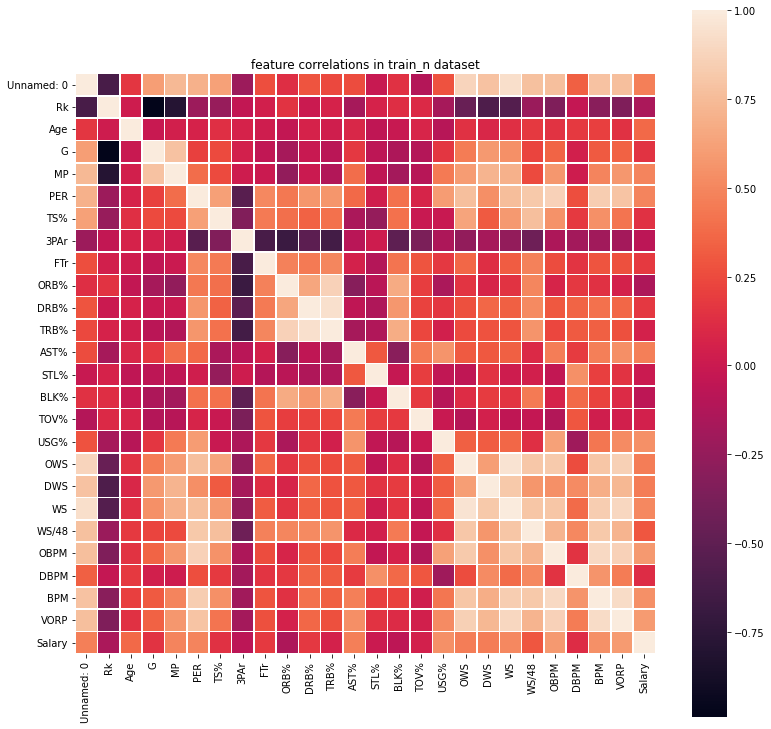

In [ ]:
sml = Speedml('train.csv', 'test.csv',
              target='Salary', uid='Player')
sml.plot.correlate()
sml.eda()

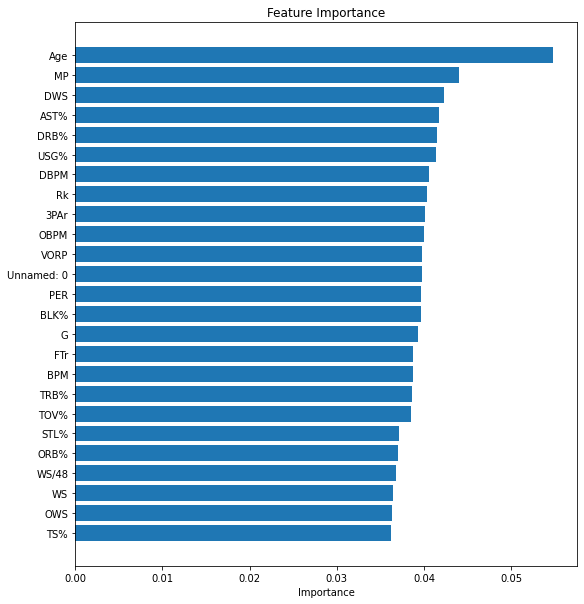

In [ ]:
sml.plot.importance()

In [ ]:
def searchStats(a):
  for i in range(0,len(df)):
    if df['Player'][i] == a:
      return i
  return False
searchStats('Ste')

False

Pearson correlation:  0.561226876006043
p-value            :  3.7085657663968475e-34


Text(0.5, 0, 'BPM (Box Plus/Minus)')

Text(0, 0.5, 'Salary')


y = 1981082.5813040307*x + 9698703.11537063


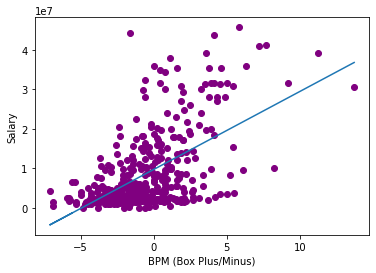

In [ ]:
var1 = np.asarray(df['BPM'])
var2 = np.asarray(df['Salary'])
pearson, pvalue= pearsonr(var1, var2)
print('Pearson correlation: ', pearson)
print('p-value            : ', pvalue)

x = df['BPM'].astype('float32')
y = df['Salary'].astype('float32')
a, b = np.polyfit(x, y, 1)
pyplot.scatter(x, y, color='purple')
pyplot.plot(x, a*x+b)
pyplot.xlabel('BPM (Box Plus/Minus)')
pyplot.ylabel('Salary')
print("\n"+ "y = "+ str(a)+"*x + " + str(b))

Pearson correlation:  0.6009356809769573
p-value            :  3.873587592344332e-40


Text(0.5, 0, 'VORP (Value over replacement player)')

Text(0, 0.5, 'Salary')


y = 4452898.933071364*x + 5299985.777798921


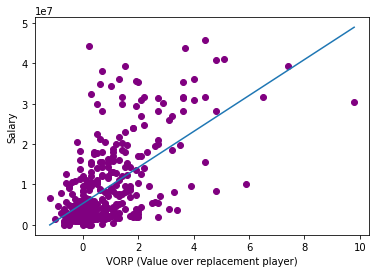

In [ ]:
var1 = np.asarray(df['VORP'])
var2 = np.asarray(df['Salary'])
pearson, pvalue= pearsonr(var1, var2)
print('Pearson correlation: ', pearson)
print('p-value            : ', pvalue)

x = df['VORP'].astype('float32')
y = df['Salary'].astype('float32')
a, b = np.polyfit(x, y, 1)
pyplot.scatter(x, y, color='purple')
pyplot.plot(x, a*x+b)
pyplot.xlabel('VORP (Value over replacement player)')
pyplot.ylabel('Salary')
print("\n"+"y = "+ str(a)+"*x + " + str(b))

Pearson correlation:  0.5408206427965783
p-value            :  2.1958982381533754e-31


Text(0.5, 0, 'USG% (Usage Percentage)')

Text(0, 0.5, 'Salary')


y = 985166.433526997*x + -9947239.888682622


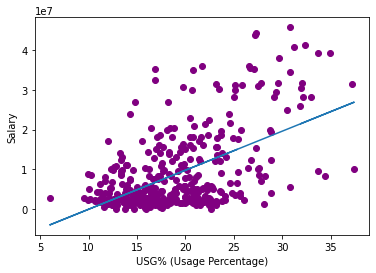

In [ ]:
var1 = np.asarray(df['USG%'])
var2 = np.asarray(df['Salary'])
pearson, pvalue= pearsonr(var1, var2)
print('Pearson correlation: ', pearson)
print('p-value            : ', pvalue)

x = df['USG%'].astype('float32')
y = df['Salary'].astype('float32')
a, b = np.polyfit(x, y, 1)
pyplot.scatter(x, y, color='purple')
pyplot.plot(x, a*x+b)
pyplot.xlabel('USG% (Usage Percentage)')
pyplot.ylabel('Salary')
print("\n"+"y = "+ str(a)+"*x + " + str(b))

Pearson correlation:  0.36636857523111754
p-value            :  5.4165563655959087e-14


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Salary')


y = 817818.1901429041*x + -12558556.324033031


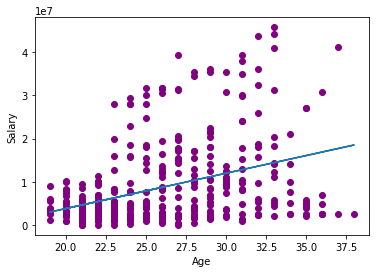

In [ ]:
var1 = np.asarray(df['Age'])
var2 = np.asarray(df['Salary'])
pearson, pvalue= pearsonr(var1, var2)
print('Pearson correlation: ', pearson)
print('p-value            : ', pvalue)

x = df['Age'].astype('float32')
y = df['Salary'].astype('float32')
a, b = np.polyfit(x, y, 1)
pyplot.scatter(x, y, color='purple')
pyplot.plot(x, a*x+b)
pyplot.xlabel('Age')
pyplot.ylabel('Salary')
print("\n"+"y = "+ str(a)+"*x + " + str(b))

In [ ]:
X = df[['BPM', 'VORP', 'USG%', 'Age']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y1_pred = regressor.predict(X_train)
d = pd.DataFrame({'Salary': y_test, 'Predicted': y_pred})
d1 = pd.DataFrame({'Salary': y_train, 'Predicted': y1_pred})

LinearRegression()

In [ ]:
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5091395.523535399
Mean Squared Error: 50640044441506.8
Root Mean Squared Error: 7116181.872430383


In [ ]:
d = d.append(d1)
d = d.sort_index()
d = d.merge(df['Player'], left_index = True, right_index = True)

In [ ]:
def isWaste(a):
  i = searchStats(a)
  if i != False:
    if float(d['Salary'][i]) - float(d['Predicted'][i]) > 0:
      if abs(abs(float(d['Salary'][i])) - abs(float(d['Predicted'][i]))) < mae:
        print(a+' is not a waste. His predicted salary is:')
        print(round(d['Predicted'][i]))
        return
      else:
        print(a+' is a waste. His predicted salary is:')
        print(round(d['Predicted'][i]))
        return
    else:
      print(a+' is not a waste. His predicted salary is:')
      print(round(d['Predicted'][i]))
      return
  print('No such player')
  return False

In [ ]:
isWaste('Kevin Durant')

Kevin Durant is a waste. His predicted salary is:
34742697


In [ ]:
def isWasteBool(a):
  i = searchStats(a)
  if i != False:
    if float(d['Salary'][i]) - float(d['Predicted'][i]) > 0:
      if abs(abs(float(d['Salary'][i])) - abs(float(d['Predicted'][i]))) < mae:
        print(a+' is not a waste. His predicted salary is:')
        print(round(d['Predicted'][i]))
        return False
      else:
        print(a+' is a waste. His predicted salary is:')
        print(round(d['Predicted'][i]))
        return True
    else:
      print(a+' is not a waste. His predicted salary is:')
      print(round(d1['Predicted'][i]))
      return False
  else: 
    print('No such player')
    return False

In [ ]:
isWasteBool('Rudy Gobe=rt')

No such player


False

In [ ]:
for i in range(0,len(d['Player'])):
  d['Player'][i] = d['Player'][i].lower()

In [ ]:
 d['Player'][1]

'keifer sykes'

Pearson correlation:  0.7423321359863502
p-value            :  2.4465252025184016e-70


Text(0.5, 0, 'Actual Salary')

Text(0, 0.5, 'Predicted Salary')


y = 0.5776899823163674*x + 3697911.8155652895


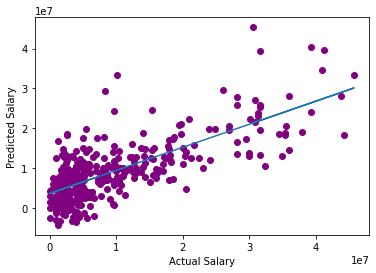

In [ ]:
var1 = np.asarray(d['Salary'])
var2 = np.asarray(d['Predicted'])
pearson, pvalue= pearsonr(var1, var2)
print('Pearson correlation: ', pearson)
print('p-value            : ', pvalue)

x = d['Salary'].astype('float32')
y = d['Predicted'].astype('float32')
a, b = np.polyfit(x, y, 1)
pyplot.plot(x, a*x+b)
pyplot.scatter(x, y, color = 'purple')
pyplot.xlabel('Actual Salary')
pyplot.ylabel('Predicted Salary')

print("\n"+"y = "+ str(a)+"*x + " + str(b))

In [ ]:
from pathlib import Path 
filepath = Path('D:\\CSDS\\CSDS133\\predictions_lowercase.csv')  
d.to_csv(filepath)